# Chapter 7 Drone Remote Pilot: Photogrammetry

1. [Introduction: Photogrammetry](#1.-Introduction)
2. [Simulation: Image Scale and Ground Distance](#2.-Simulation)
3. [Simulation: Object Height from Relief Displacement](#3.-Simulation)
4. [Simulation: Photo Scale Calculator](#4.-Simulation)
5. [Simulation: Ground Distance Estimator from Photo Scale](#5.-Simulation)
6. [Simulation: Parallax-Based Height Estimator](#6.-Simulation)
7. [Simulation:  Photo-to-Ground Coordinate Converter](#7.-Simulation)
8. [Simulation: Interactive Lens Simulation](#8.-Simulation)
9. [Simulation: Stereo Depth Estimation Using Image Parallax](#9.-Simulation)
10. [Simulation: tereo Depth Estimation](#10.-Simulation)
11. [Simulation: Camera Calibration using Chessboard](#11.-Simulation)
12. [Self-Assessment](#12.-Self-Assessment)

## 1. Introduction

### 🏞️ Photogrammetry Fundamentals

### 📸 What is Photogrammetry?
**Photogrammetry** is the science of obtaining reliable measurements, 3D models, and maps from photographs, typically aerial or satellite images. It converts 2D image data into spatially accurate information by analyzing parallax and geometry.

---

### 🌟 Importance of Photogrammetry
- Enables precise **topographic mapping** without ground contact
- Essential in **remote sensing**, **urban planning**, and **environmental monitoring**
- Supports **historical reconstruction**, **archaeology**, and **disaster assessment**
- Fuels **3D modeling** in BIM (Building Information Modeling) and **game development**

---

### ✅ Advantages
- Non-invasive and cost-effective
- High-resolution spatial information
- Suitable for **large-area mapping**
- Easily integrates with **GIS systems**
- Accessible with drones and lightweight equipment

---

### ⚠️ Limitations
- Accuracy depends on **image quality** and **camera calibration**
- Requires good **lighting conditions** and **clear visibility**
- Challenging in **dense vegetation** or **uniform terrain**
- Geometric errors due to lens distortion or **relief displacement**

---

### 🔁 Parallax
**Parallax** is the apparent displacement of an object’s position when viewed from two different angles.  
In photogrammetry, analyzing parallax between overlapping images allows for **depth calculation** and **3D reconstruction**.

---

### 🧱 Structure from Motion (SfM)
**SfM** is a technique that reconstructs 3D structures from a series of 2D images taken from varying viewpoints.  
It estimates camera positions and creates a **dense point cloud**, leading to **meshes**, **orthophotos**, and **digital surface models (DSM)**.

---

### 🗻 Relief Displacement
Relief displacement is the radial distortion that occurs when elevated objects appear shifted in aerial photos.  
It increases with:
- Height of the object  
- Distance from the photo center  
It’s corrected during **orthorectification** to ensure accurate measurements.

---

### 🧩 Orthomosaic
An **orthomosaic** is a georeferenced, distortion-free image mosaic composed of many overlapping aerial images.  
It’s generated by correcting relief displacement, lens distortion, and camera tilt, producing a seamless, spatially accurate image.

---

### ⚔️ Photogrammetry vs. LiDAR

| Feature                 | Photogrammetry                          | LiDAR                                |
|------------------------|------------------------------------------|---------------------------------------|
| Data Source            | Optical imagery                          | Laser pulses and reflections          |
| Output                 | Orthophotos, DSMs, textured 3D models    | Point clouds, DEMs, canopy heights    |
| Light Conditions       | Needs good lighting                      | Works in darkness or cloudy weather   |
| Vegetation Penetration | Limited                                  | Excellent (can penetrate canopy)      |
| Equipment              | Cameras, drones                          | LiDAR scanners (often costlier)       |
| Use Cases              | Mapping, 3D modeling, cultural heritage  | Forestry, flood mapping, terrain modeling |

---

### 🗂️ Key Photogrammetric Terms & Expressions

- **Overlap:** Percentage of shared coverage between consecutive images  
- **Base-to-Height Ratio (B/H):** Ratio used to calculate vertical exaggeration  
- **Interior Orientation:** Camera parameters (e.g., focal length) used for image correction  
- **Exterior Orientation:** Position and orientation of camera in space during capture  
- **Tie Points:** Common points in overlapping images used for alignment  
- **Ground Control Points (GCPs):** Known geospatial references used for accurate georeferencing  
- **DEM (Digital Elevation Model):** Represents bare-earth surface without vegetation or buildings  
- **DSM (Digital Surface Model):** Includes elevation of terrain, vegetation, and structures  
- **Bundle Adjustment:** Optimization process that refines 3D geometry and camera positions  
- **Phototriangulation:** Technique to derive 3D coordinates from multiple overlapping photos  

---

### Foundational literature

{cite}`wolf_elements_2000` is widely regarded as a foundational text for civil engineers and surveyors interested in photogrammetry. The book includes geometry of aerial photography, stereoscopic viewing, and image measurements. In-depth discusson on  topographic mapping, infrastructure planning, and spatial data collection which are key to civil enginering discipline. The book also delves into Integration with GIS, especially showing how photogrammetric data supports geographic information systems for engineering analysis.

## 2. Simulation

### 📷 Photogrammetry Concept: Image Scale and Ground Distance

### 🔍 Key Idea
Photogrammetry uses image measurements to estimate real-world distances. The **scale factor** is calculated using known reference points:

$$
\text{Scale} = \frac{\text{Ground Distance}}{\text{Image Distance (pixels)}}
$$

### ✅ Application
Once the scale is known, any pixel measurement can be converted to ground distance:

$$
\text{Ground Distance} = \text{Pixel Distance} \times \text{Scale}
$$

### 📊 Use Cases
- Estimating distances from aerial photos
- Mapping features from drone imagery
- Teaching spatial relationships in remote sensing

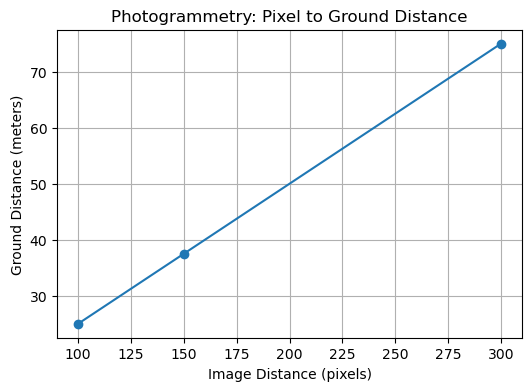

100 pixels ≈ 25.00 meters
150 pixels ≈ 37.50 meters
300 pixels ≈ 75.00 meters


In [2]:
# 📦 Import libraries
import matplotlib.pyplot as plt

# 🧮 Define known reference
image_distance_px = 200  # distance between two points in image (pixels)
ground_distance_m = 50   # actual ground distance between those points (meters)

# 🔁 Calculate scale factor
scale = ground_distance_m / image_distance_px  # meters per pixel

# 📌 Example: Convert other image measurements to ground distances
other_distances_px = [100, 150, 300]  # pixel distances
ground_distances_m = [d * scale for d in other_distances_px]

# 📊 Plot for visualization
plt.figure(figsize=(6, 4))
plt.plot(other_distances_px, ground_distances_m, marker='o')
plt.xlabel("Image Distance (pixels)")
plt.ylabel("Ground Distance (meters)")
plt.title("Photogrammetry: Pixel to Ground Distance")
plt.grid(True)
plt.show()

# 🖨️ Print results
for px, m in zip(other_distances_px, ground_distances_m):
    print(f"{px} pixels ≈ {m:.2f} meters")

## 3. Simulation

### 🏗️ Estimating Object Height from Relief Displacement

### 📌 Principle
In vertical aerial photographs, elevated objects appear displaced outward from the image center. This displacement can be used to estimate object height.

### 📐 Formula
$$
h = \frac{d \cdot H}{r}
$$

Where:
- $( h $) = object height (meters)  
- $( d $) = relief displacement (mm)  
- $( H $) = flying height above ground (meters)  
- $( r $) = radial distance from image center to top of object (mm)

### ✅ Application
- Estimating building or tree height from aerial photos
- Teaching geometric principles of photogrammetry
- Understanding scale and displacement relationships

In [3]:
# 📦 Import libraries
import ipywidgets as widgets
from IPython.display import display
import math

# 🎛️ Define interactive widgets
focal_length_mm = widgets.FloatSlider(value=50, min=10, max=100, step=1, description='Focal Length (mm)')
flying_height_m = widgets.FloatSlider(value=1000, min=100, max=5000, step=100, description='Flying Height (m)')
radial_distance_mm = widgets.FloatSlider(value=120, min=50, max=300, step=5, description='Radial to Top (mm)')
base_distance_mm = widgets.FloatSlider(value=100, min=50, max=300, step=5, description='Radial to Base (mm)')

# 📊 Define computation and display function
def estimate_height(focal_length_mm, flying_height_m, radial_distance_mm, base_distance_mm):
    displacement_mm = radial_distance_mm - base_distance_mm
    if radial_distance_mm == 0:
        print("Radial distance to top cannot be zero.")
        return
    object_height_m = (displacement_mm * flying_height_m) / radial_distance_mm
    print(f"📐 Relief Displacement: {displacement_mm:.2f} mm")
    print(f"🏗️ Estimated Object Height: {object_height_m:.2f} meters")

# 🔁 Create interactive output
ui = widgets.VBox([focal_length_mm, flying_height_m, radial_distance_mm, base_distance_mm])
out = widgets.interactive_output(estimate_height, {
    'focal_length_mm': focal_length_mm,
    'flying_height_m': flying_height_m,
    'radial_distance_mm': radial_distance_mm,
    'base_distance_mm': base_distance_mm
})

# 🖥️ Display UI
display(ui, out)

Output()

## 4. Simulation

### 📏 Photo Scale Calculator (Interactive)

This interactive tool computes the photographic scale based on camera focal length and flying height.

- **Inputs:**
  - `Focal Length (mm)`: Slider for camera lens focal length.
  - `Flying Height (m)`: Slider for aircraft altitude above ground.

- **Computation:**
  - Calculates photo scale using:
    \[
    \text{Scale} = \frac{\text{Focal Length (mm)}}{\text{Flying Height (mm)}}
    \quad \Rightarrow \quad \text{Scale Ratio} = 1 : \left(\frac{1}{\text{Scale}}\right)
    \]

- **Output:**
  - Displays the photo scale as a ratio (e.g., 1:20000).

📸 Useful for aerial survey planning and photogrammetric analysis.

In [4]:
import ipywidgets as widgets
from IPython.display import display

focal_length_mm = widgets.FloatSlider(value=50, min=10, max=100, step=1, description='Focal Length (mm)')
flying_height_m = widgets.FloatSlider(value=1000, min=100, max=5000, step=100, description='Flying Height (m)')

def compute_scale(focal_length_mm, flying_height_m):
    scale = focal_length_mm / (flying_height_m * 1000)
    print(f"📏 Photo Scale ≈ 1:{1/scale:.0f}")

display(widgets.VBox([focal_length_mm, flying_height_m]))
widgets.interactive_output(compute_scale, {'focal_length_mm': focal_length_mm, 'flying_height_m': flying_height_m})

Output()

### 5. Simulation

### 🌍 Ground Distance Estimator from Photo Scale (Interactive)

This interactive tool calculates real-world ground distance based on measured photo distance and map scale.

- **Inputs:**
  - `Photo Distance (mm)`: Slider for measured distance on the photo.
  - `Scale (1:X)`: Slider for map scale ratio.

- **Computation:**
  - Converts photo distance to ground distance using:
    $$
    \text{Ground Distance (m)} = \frac{\text{Photo Distance (mm)} \times \text{Scale}}{1000}
    $$

- **Output:**
  - Displays the estimated ground distance in meters.

🗺️ Ideal for basic photogrammetric distance conversions.

In [5]:
photo_distance_mm = widgets.FloatSlider(value=150, min=10, max=500, step=10, description='Photo Distance (mm)')
scale_ratio = widgets.IntSlider(value=20000, min=5000, max=50000, step=1000, description='Scale (1:X)')

def estimate_ground_distance(photo_distance_mm, scale_ratio):
    ground_distance_m = photo_distance_mm * scale_ratio / 1000
    print(f"🌍 Ground Distance ≈ {ground_distance_m:.2f} meters")

display(widgets.VBox([photo_distance_mm, scale_ratio]))
widgets.interactive_output(estimate_ground_distance, {'photo_distance_mm': photo_distance_mm, 'scale_ratio': scale_ratio})

Output()

## 6. Simulation

### 🔭 Parallax-Based Height Estimator (Interactive)

This interactive tool estimates ground object height using parallax measurements from aerial photographs.

- **Inputs:**
  - `Parallax (mm)`: Slider for measured parallax.
  - `Base Length (mm)`: Slider for camera base length.
  - `Flying Height (m)`: Slider for aircraft flying height.

- **Computation:**
  - Estimates object height using:
    $$
    \text{Height (m)} = \frac{\text{Parallax} \times \text{Flying Height}}{\text{Base Length} + \text{Parallax}}
    $$

- **Output:**
  - Displays the estimated height in meters.

📡 Useful for photogrammetric analysis and terrain profiling.

In [6]:
parallax_mm = widgets.FloatSlider(value=2.5, min=0.1, max=10, step=0.1, description='Parallax (mm)')
base_mm = widgets.FloatSlider(value=60, min=10, max=200, step=5, description='Base Length (mm)')
flying_height_m = widgets.FloatSlider(value=1500, min=100, max=5000, step=100, description='Flying Height (m)')

def estimate_height_parallax(parallax_mm, base_mm, flying_height_m):
    height_m = (parallax_mm * flying_height_m) / (base_mm + parallax_mm)
    print(f"🔭 Estimated Height from Parallax ≈ {height_m:.2f} meters")

display(widgets.VBox([parallax_mm, base_mm, flying_height_m]))
widgets.interactive_output(estimate_height_parallax, {
    'parallax_mm': parallax_mm,
    'base_mm': base_mm,
    'flying_height_m': flying_height_m
})

Output()

## 7. Simulation

### 📐 Photo-to-Ground Coordinate Converter (Interactive)

This interactive widget-based tool allows users to input photo coordinates (in millimeters) and a map scale ratio to compute approximate ground coordinates (in meters).

- **Inputs:**
  - `Photo X (mm)` and `Photo Y (mm)`: Sliders to set photo coordinates.
  - `Scale (1:X)`: Slider to set the map scale ratio.

- **Computation:**
  - Converts photo coordinates to ground coordinates using:
    $$
    \text{Ground X (m)} = \frac{\text{Photo X (mm)} \times \text{Scale}}{1000}
    $$
    $$
    \text{Ground Y (m)} = \frac{\text{Photo Y (mm)} \times \text{Scale}}{1000}
    $$

- **Output:**
  - Displays the computed ground coordinates in meters.

🔄 Real-time updates as sliders are adjusted.

In [7]:
photo_x_mm = widgets.FloatSlider(value=80, min=0, max=300, step=10, description='Photo X (mm)')
photo_y_mm = widgets.FloatSlider(value=120, min=0, max=300, step=10, description='Photo Y (mm)')
scale_ratio = widgets.IntSlider(value=25000, min=5000, max=50000, step=1000, description='Scale (1:X)')

def convert_coordinates(photo_x_mm, photo_y_mm, scale_ratio):
    ground_x_m = photo_x_mm * scale_ratio / 1000
    ground_y_m = photo_y_mm * scale_ratio / 1000
    print(f"🗺️ Ground Coordinates ≈ ({ground_x_m:.2f}, {ground_y_m:.2f}) meters")

display(widgets.VBox([photo_x_mm, photo_y_mm, scale_ratio]))
widgets.interactive_output(convert_coordinates, {
    'photo_x_mm': photo_x_mm,
    'photo_y_mm': photo_y_mm,
    'scale_ratio': scale_ratio
})

Output()

## 8. Simulation

### 🐇 Interactive Lens Simulation in Python

This code simulates the visual effects of different camera lens settings on an image (a rabbit photo), using interactive sliders with `ipywidgets`.

---

### 🔧 What It Does:
- Loads and resizes a sample image (`rabbit.jpg`)
- Provides sliders to adjust:
  - **ISO sensitivity**
  - **Focal length**
  - **Shutter speed**
  - **Distance to object**
- Applies **blur** based on focal length and distance
- Adjusts **brightness** based on ISO and shutter speed
- Updates image in real-time when sliders change

---

### 🎛️ How It Works:
1. **Widgets**: Sliders created using `ipywidgets.IntSlider` and `FloatSlider`
2. **Image Manipulation**: Performed using `PIL.ImageFilter` and `ImageEnhance`
3. **Interactivity**: `.observe()` links sliders to `simulate_image()` function
4. **Display**: Final image shown in a `matplotlib` plot with no axis for clarity

---

### 🖼️ Use Case:
Great for educational demos to show how photographic parameters impact image quality — especially in teaching exposure and depth of field concepts.



In [8]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image, ImageFilter, ImageEnhance
import numpy as np

# 🐇 Load your rabbit image
img = Image.open("rabbit.jpg").convert("RGB")
img = img.resize((300, 300))

# 🎚️ Sliders for lens parameters
iso_slider = widgets.IntSlider(value=100, min=100, max=6400, step=100, description='ISO:')
focal_slider = widgets.IntSlider(value=50, min=18, max=300, step=5, description='Focal Length (mm):')
shutter_slider = widgets.FloatSlider(value=1/125, min=1/4000, max=1, step=0.01, description='Shutter Speed (s):')
distance_slider = widgets.FloatSlider(value=2.0, min=0.5, max=10.0, step=0.1, description='Distance to Object (m):')
output = widgets.Output()

# 🎨 Simulation function
def simulate_image(change=None):
    output.clear_output()
    ISO = iso_slider.value
    focal = focal_slider.value
    shutter = shutter_slider.value
    distance = distance_slider.value

    # ➕ Simulate blur: longer focal length and further distance = more blur
    blur_radius = min(5, (focal / 100) * (distance / 2))
    blurred = img.filter(ImageFilter.GaussianBlur(radius=blur_radius))

    # 🔅 Simulate brightness: ISO and shutter speed affect exposure
    exposure_factor = min(2.0, (ISO / 400) * shutter)
    enhancer = ImageEnhance.Brightness(blurred)
    final_image = enhancer.enhance(exposure_factor)

    with output:
        plt.figure(figsize=(4, 4))
        plt.imshow(final_image)
        plt.axis('off')
        plt.title(f"ISO:{ISO} | Focal:{focal}mm | Shutter:{shutter:.3f}s | Distance:{distance}m")
        plt.show()

# 🔄 Interactivity
for slider in [iso_slider, focal_slider, shutter_slider, distance_slider]:
    slider.observe(simulate_image, names='value')

# 🚀 Display the interface
display(widgets.VBox([iso_slider, focal_slider, shutter_slider, distance_slider, output]))
simulate_image()


## 9. Simulation

### 🔍 Interactive Stereo Depth Estimation Using Image Parallax

This Python widget simulates stereo vision depth perception from a single image using parallax cropping.

---

### 🧠 Core Concept

It visualizes how camera baseline, focal length, and image disparity affect depth estimation:

$$ Z = \frac{f \cdot B}{d} $$  
Where:  
- $( Z $): Estimated depth (meters)  
- $( f $): Focal length (pixels)  
- $( B $): Baseline (meters)  
- $( d $): Disparity (pixels)

---

### 🎛️ Inputs (Interactive Sliders)

| Parameter           | Type        | Range           | Description                             |
|--------------------|-------------|------------------|-----------------------------------------|
| Camera Baseline     | FloatSlider | 0.01 – 1.0 m     | Distance between stereo cameras         |
| Focal Length        | FloatSlider | 100 – 2000 px    | Camera lens focal length                |
| Disparity           | IntSlider   | 1 – 100 px       | Horizontal pixel shift between views    |

---

### 📐 Visual Output

- Side-by-side display of two cropped views simulating left/right camera images.
- Title shows real-time estimated object distance.
- Updates instantly when sliders are changed.

---

### 💡 Interpretation Tips

- 📉 Larger disparity → object is closer  
- 📏 Larger baseline or focal length → more accurate depth  
- 🧪 Great for visualizing stereo geometry in drones or vision systems  

---

*Use this widget to experiment with stereo depth principles, ideal for UAV vision calibration or teaching computer vision fundamentals.*


In [9]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import numpy as np

# 🐇 Load rabbit image
img = Image.open("rabbit.jpg").convert("RGB").resize((300, 300))

# 🎛️ Stereo baseline and disparity sliders
baseline_slider = widgets.FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='Camera Baseline (m):')
focal_slider = widgets.FloatSlider(value=800, min=100, max=2000, step=50, description='Focal Length (pixels):')
disparity_slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='Disparity (pixels):')
output = widgets.Output()

# 📐 Parallax Distance Estimation Function
def update_estimate(change=None):
    output.clear_output()
    baseline = baseline_slider.value
    focal_length = focal_slider.value
    disparity = disparity_slider.value

    # Estimate depth: Z = (f * B) / d
    depth = (focal_length * baseline) / disparity

    # Simulate parallax by shifting image
    shift_pixels = disparity
    img_shifted = np.array(img)
    left_view = img_shifted[:, :-shift_pixels]
    right_view = img_shifted[:, shift_pixels:]

    with output:
        fig, axs = plt.subplots(1, 2, figsize=(8, 4))
        axs[0].imshow(left_view)
        axs[0].set_title("Left Camera View")
        axs[0].axis('off')
        axs[1].imshow(right_view)
        axs[1].set_title("Right Camera View")
        axs[1].axis('off')
        plt.suptitle(f"Estimated Distance to Object ≈ {depth:.2f} meters", fontsize=14)
        plt.tight_layout()
        plt.show()

# 🔄 Attach interactivity
for slider in [baseline_slider, focal_slider, disparity_slider]:
    slider.observe(update_estimate, names='value')

# 🚀 Display UI
display(widgets.VBox([baseline_slider, focal_slider, disparity_slider, output]))
update_estimate()


## 10. Simulation

### 🎯 Stereo Depth Estimation with OpenCV and IPython Widgets

This code creates an interactive tool for estimating depth using stereo images and block matching:

---

### 💡 What It Does

- Loads grayscale stereo images (`left.jpeg` and `right.jpeg`)
- Uses OpenCV’s **StereoBM** algorithm to compute a disparity map
- Calculates depth for each pixel using:

  $$ \text{Depth} = \frac{\text{Focal Length} \cdot \text{Baseline}}{\text{Disparity}} $$

- Displays:
  - Left and right views
  - Computed disparity map
  - Estimated depth map

- Allows interactive adjustment of:
  - **Camera Baseline** (distance between cameras)
  - **Focal Length** (in pixels)
  - **Block Size** (used for stereo matching window)

---

### 🖥️ Ideal Use Case

Visualizing depth from stereo imagery and testing stereo block matching parameters for UAV or robotics applications.


In [10]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import cv2
import numpy as np

# 📷 Load stereo images
img_left = cv2.imread("left.jpeg", cv2.IMREAD_GRAYSCALE)
img_right = cv2.imread("right.jpeg", cv2.IMREAD_GRAYSCALE)

# ✅ Validate image load
if img_left is None or img_right is None:
    raise FileNotFoundError("❌ One or both images could not be loaded. Check the file paths.")

# 📐 Estimate block size heuristically
def estimate_block_size(img_left, img_right):
    height, width = img_left.shape
    min_dim = min(height, width)

    # Heuristic: set block size between 5 and 41 based on image dimensions
    estimated = int(min_dim * 0.025)
    if estimated % 2 == 0:
        estimated += 1
    return max(5, min(estimated, 41))

# 🎛️ Slider setup (block size removed)
baseline_slider = widgets.FloatSlider(value=0.1, min=0.01, max=100.0, step=0.01, description='Baseline (m):')
focal_slider = widgets.FloatSlider(value=800, min=1, max=200, step=50, description='Focal Length (px):')
output = widgets.Output()

# 🧮 Interactive update function
def update_disparity(change=None):
    output.clear_output()
    baseline = baseline_slider.value
    focal = focal_slider.value
    block_size = estimate_block_size(img_left, img_right)

    # StereoBM computation
    stereo = cv2.StereoBM_create(numDisparities=64, blockSize=block_size)
    disparity = stereo.compute(img_left, img_right).astype(np.float32) / 16.0
    disparity[disparity <= 0] = 0.1  # prevent divide by zero

    # Depth calculation
    depth_map = (focal * baseline) / disparity

    with output:
        fig, axs = plt.subplots(2, 2, figsize=(10, 8))

        axs[0, 0].imshow(img_left, cmap='gray')
        axs[0, 0].set_title("Left View")
        axs[0, 0].axis('off')

        axs[0, 1].imshow(img_right, cmap='gray')
        axs[0, 1].set_title("Right View")
        axs[0, 1].axis('off')

        disp_img = axs[1, 0].imshow(disparity, cmap='plasma')
        axs[1, 0].set_title(f"Disparity Map\n(Block Size: {block_size})")
        axs[1, 0].axis('off')
        fig.colorbar(disp_img, ax=axs[1, 0], fraction=0.046, pad=0.04, label='Disparity Value')

        depth_img = axs[1, 1].imshow(depth_map, cmap='viridis')
        axs[1, 1].set_title("Estimated Depth")
        axs[1, 1].axis('off')
        fig.colorbar(depth_img, ax=axs[1, 1], fraction=0.046, pad=0.04, label='Depth (m)')


        plt.suptitle("Stereo Depth Estimation", fontsize=14)
        plt.tight_layout()
        plt.show()

# 🔄 Hook sliders
for s in [baseline_slider, focal_slider]:
    s.observe(update_disparity, names='value')

# 🚀 Launch interface
display(widgets.VBox([baseline_slider, focal_slider, output]))
update_disparity()


## 11. Simulation 

### 🎯 Camera Calibration using Chessboard Pattern in OpenCV

This code performs intrinsic camera calibration by detecting a known checkerboard pattern in multiple images.

---

### 📐 What It Does

- Defines a checkerboard grid size for calibration
- Prepares 3D object points (real-world coordinates)
- Detects corresponding 2D image points from calibration images
- Refines corner positions using sub-pixel accuracy
- Estimates camera parameters using `cv2.calibrateCamera()`

---

### 📋 Outputs

- **Camera Matrix**: Contains intrinsic parameters like focal length and optical center  
- **Distortion Coefficients**: Lens distortion values  
- **Rotation & Translation Vectors**: Pose information per calibration image

---

### ✅ Use Case

Essential for correcting lens distortion and enabling accurate 3D reconstruction, particularly useful in UAV vision, robotics, and photogrammetry.


In [11]:
import cv2
import numpy as np
import glob

# 🧮 Checkerboard dimensions (number of inner corners per row and column)
CHECKERBOARD = (9, 6)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# 📌 Prepare object points like (0,0,0), (1,0,0), ..., (8,5,0)
objp = np.zeros((CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

objpoints = []  # 3D points in real world space
imgpoints = []  # 2D points in image plane

# 🖼️ Load your calibration images
images = glob.glob('calibration_images/*.jpeg')

image_shape = None  # Add this before the loop

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, None)
    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        image_shape = gray.shape[::-1]  # Save the shape for calibration

        cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
        cv2.imshow('Corners', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

# Make sure shape was successfully captured
if image_shape is None:
    raise ValueError("No valid calibration image found. Make sure the pattern was detected.")

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_shape, None, None)


for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 🔎 Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, None)

    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        # 🎯 Visualize corners
        cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
        cv2.imshow('Corners', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

# 🧮 Calibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# 📋 Display results
print("Camera Matrix (Intrinsic parameters):\n", mtx)
print("\nDistortion Coefficients:\n", dist)
print("\nRotation Vectors:\n", rvecs[0])
print("\nTranslation Vectors:\n", tvecs[0])


ValueError: No valid calibration image found. Make sure the pattern was detected.

## 12. Self-Assessment


### 🤔 Conceptual Questions

1. How does parallax enable 3D reconstruction in photogrammetry?
2. Why is relief displacement more pronounced for taller objects positioned farther from the image center?
3. What is the significance of Ground Control Points (GCPs) in photogrammetric processing?
4. Compare the outputs generated by Structure from Motion (SfM) and traditional stereoscopic photogrammetry.
5. How does orthorectification improve the spatial accuracy of aerial imagery?

---

### 🧠 Reflective Questions

1. Which applications of photogrammetry do you find most impactful in civil or environmental engineering, and why?
2. How might limitations like vegetation cover or lighting conditions influence the data quality in a project you’ve worked on?
3. Consider the trade-offs between LiDAR and photogrammetry—how would you decide which method to use in a mapping scenario?
4. Reflect on how integrating photogrammetric data with GIS has enhanced your understanding of spatial analysis.
5. What ethical considerations should engineers keep in mind when collecting aerial data in populated or sensitive regions?

---

### ❓ Quiz Questions

**Q1.** What does SfM stand for and what is its primary output?  
**A.** Structure from Motion; Dense point clouds and 3D meshes

**Q2.** Which photogrammetric term refers to known geospatial references used for accurate image alignment?  
**A.** Ground Control Points (GCPs)

**Q3.** Which technology can penetrate dense vegetation more effectively?  
**A.** LiDAR

**Q4.** What key ratio affects vertical exaggeration in aerial imagery?  
**A.** Base-to-Height Ratio (B/H)

**Q5.** What correction method mitigates relief displacement in aerial photographs?  
**A.** Orthorectification

---
